#   Employee Absenteeism

## 1.Problem Description

**XYZ is a courier company. As we appreciate that human capital plays an important role in collection, transportation and delivery. The company is passing through genuine issue of Absenteeism. The company has shared it dataset and requested to have an answer on the following areas:**

 **1 . What changes company should bring to reduce the number of absenteeism?**<br>
 **2 . How much losses every month can we project in 2011 if same trend of absenteeism continues?**

***Define and categorize the problem statement***<br>
*The problem statement is to analyze the cause of absenteeism and predict the every month losses in 2011 due to absenteism. Our task is to build a regression model which will predict the absentieesm in hours based on the employee attributes and information. Although, the problem statement is a Multivariate Time-Series Problem. We will approach it as a Regression Problem.*

In [1]:
import os
os.chdir("F:\ed_project_2\py")

In [2]:
## Import all the required libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

#for preprocessing
from fancyimpute import KNN
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

#for model building
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#for model selection
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#for visualization
import matplotlib.pyplot as plt 
import seaborn as sns

#for model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

C:\Users\Gravity\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


#### Reading Data:

In [3]:
#Importing dataset
data = pd.read_excel("Absenteeism_at_work_Project.xls")

# 2. Exploratory Data Analysis[EDA]

In [4]:
data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


*Here the target variable is: 'Absenteeism time in hour' and other 20 columns, which are mix of continous and categorical variables are predictors.*

In [5]:
print("column names: {}".format(data.columns))
print("*"*99)
print("shape of data: {}".format(data.shape))
print("*"*99)
print("Total number of Features : {}" .format(data.shape[1]))

column names: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
***************************************************************************************************
shape of data: (740, 21)
***************************************************************************************************
Total number of Features : 21


In [6]:
#Replacing the spaces between the variable names with underscore.
data.columns = data.columns.str.replace(' ', '_')
data = data.rename(columns = {'Work_load_Average/day_': 'Average_workload'})
data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Average_workload', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [7]:
#Summary
data.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Average_workload,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
# Check the properties of the data
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason_for_absence                 737 non-null float64
Month_of_absence                   739 non-null float64
Day_of_the_week                    740 non-null int64
Seasons                            740 non-null int64
Transportation_expense             733 non-null float64
Distance_from_Residence_to_Work    737 non-null float64
Service_time                       737 non-null float64
Age                                737 non-null float64
Average_workload                   730 non-null float64
Hit_target                         734 non-null float64
Disciplinary_failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social_drinker                     737 non-null float64
Social_smoker                      736 non-null float64
Pet  

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Average_workload                   38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

**Infer:<br>**
*There are null values in the dataset.<br>*
*The datatypes are int and float.*

## 2.1 Missing Value Analysis

In [9]:
#Creating dataframe with missing values present in each variable
missing_val = pd.DataFrame(data.isnull().sum()).reset_index()

#Calculating percentage of missing value
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Values'})
missing_val['Missing_percentage'] = (missing_val['Missing_Values']/len(data))*100
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_Values,Missing_percentage
0,Body_mass_index,31,4.189189
1,Absenteeism_time_in_hours,22,2.972973
2,Height,14,1.891892
3,Average_workload,10,1.351351
4,Education,10,1.351351
5,Transportation_expense,7,0.945946
6,Son,6,0.810811
7,Disciplinary_failure,6,0.810811
8,Hit_target,6,0.810811
9,Social_smoker,4,0.540541


**Infer:<br>**
*There are missing values in almost all the columns of the dataset, although in small amount.<br>
We'll drop all the missing value rows for target variable and We will impute null values for all other features.*

In [10]:
# Droping observation in which "Absenteeism time in hours" has missing value
data = data.drop(data[data['Absenteeism_time_in_hours'].isnull()].index, axis=0)

In [11]:
# Droping observation in which "Month_of_absence" has missing value
data = data[~data["Month_of_absence"].isnull()]

## 2.1.1 Imputing missing values

*Impute missing values for all the independent featues(exept Average_Workload).<br>
Replace missing of any employee with  information of same employee from other instances.<br>
for example if 'Age' of employee-x is missing, then impute it with 'Age' from other instance of employee-X.*

In [12]:
#lets impute missing values for all the independent featues(exept Average_Workload) with refer to "ID"
col=['Reason_for_absence', 'Day_of_the_week','Seasons', 'Transportation_expense', 
     'Distance_from_Residence_to_Work','Service_time', 'Age', 'Hit_target','Disciplinary_failure', 
     'Education', 'Son', 'Social_drinker','Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index']

for i in data['ID'].unique(): 
    for j in col :
        data.loc[((data['ID'] == i) & (data[j].isna())), j] = data[(data.ID==i)][j].max()

###  * Now let's analyze which is the best way to impute missing values for 'Average_Workload' 

Text(0, 0.5, 'Average_workload')

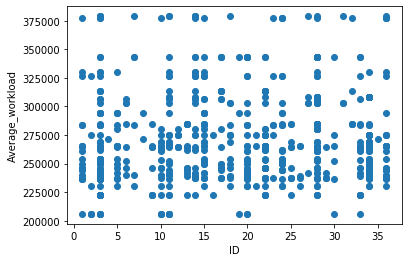

In [13]:
#lets plot scatter plot between 'ID' &'Average_workload'
plt.scatter(x='ID', y='Average_workload',data=data)
plt.xlabel('ID')
plt.ylabel('Average_workload')

**Infer:<br>
The above scatter plot shows 'Average_workload' is not depends on "ID".**

Text(0, 0.5, 'Average_workload')

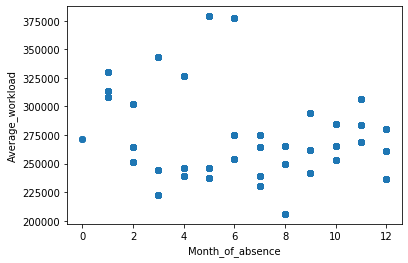

In [14]:
#lets plot scatter plot between 'Month_of_absence' &'Average_workload'
plt.scatter(x='Month_of_absence', y='Average_workload', data=data)
plt.xlabel('Month_of_absence')
plt.ylabel('Average_workload')

**Infer:**<br> 
*From above plot, we can conclude that 'Average_Workload' is distributed mostly by month.<br>*
*So,let's impute missing 'Average_Workload' by mode of that month.*

In [15]:
#Impute Average_Workload with the mode of corresponding month's workload
for i in data['Month_of_absence'].unique(): 
    mode= stats.mode(data[data['Month_of_absence']==i]['Average_workload'])[0][0]
    data.loc[((data['Month_of_absence']==i) & pd.isna(data['Average_workload'])),'Average_workload'] = mode

In [16]:
data.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Average_workload                   0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [17]:
emp=data.copy() #backup

## 2.2 Variable Identification

In [18]:
#Converting data to proper formats(Variable Identification)

categorical_var=['ID','Reason_for_absence', 'Month_of_absence', 'Day_of_the_week','Seasons',
                 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker','Social_smoker', 'Pet']

continous_var=['Transportation_expense', 'Distance_from_Residence_to_Work','Service_time', 'Age', 
               'Average_workload', 'Hit_target', 'Weight', 'Height', 'Body_mass_index','Absenteeism_time_in_hours']

for i in categorical_var:
    data[i] = data[i].astype("category")

# 2.3 Data Visualisation

### 2.3.1 Univariate Analysis

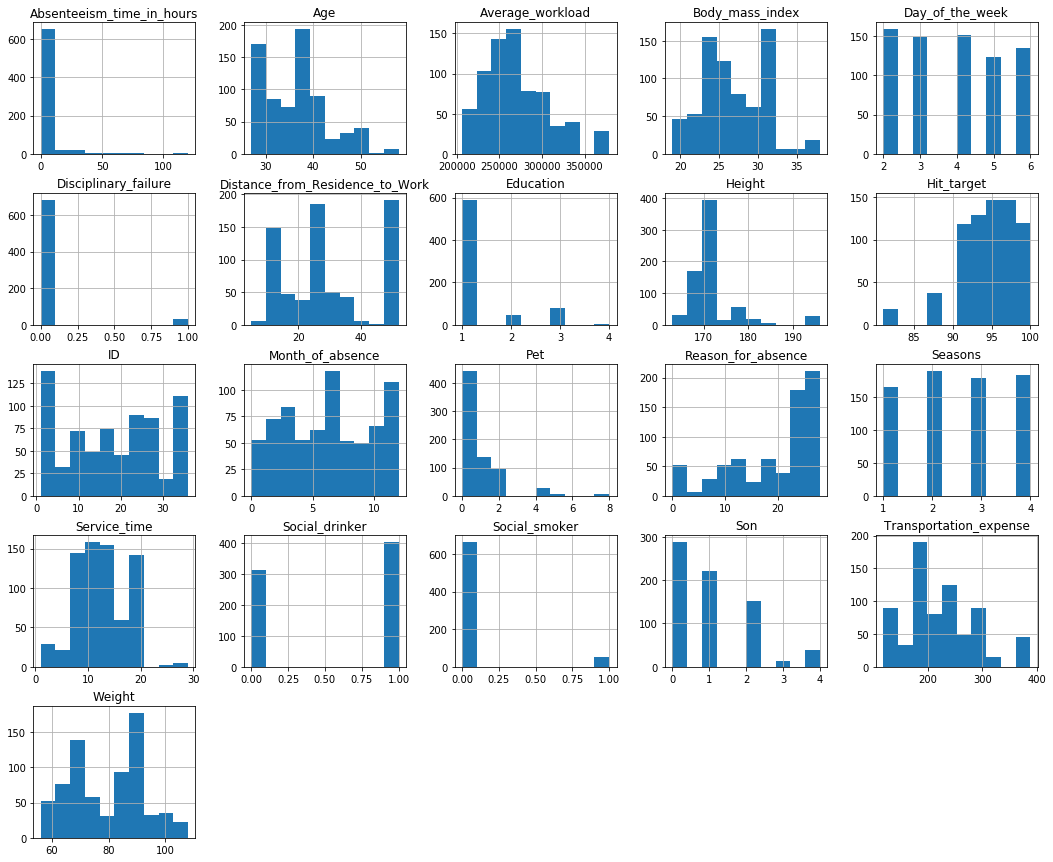

In [19]:
#Histogram plot for distribution of features in the data
import matplotlib.pyplot as plt 
emp.hist(figsize=(18,15))
plt.show()

**Infer:<br>**
From the above plot following observation are made...
* People over 40+ years of age tends to take less leaves compare to others. Majority of the employees working in the company have age below 40 years.
* A very large portion of the population have only passed ‘High School’.
* More then half of the employees in the company are ‘social drinker’.
* Only a very few portion of the employees in the company are ‘social smoker’

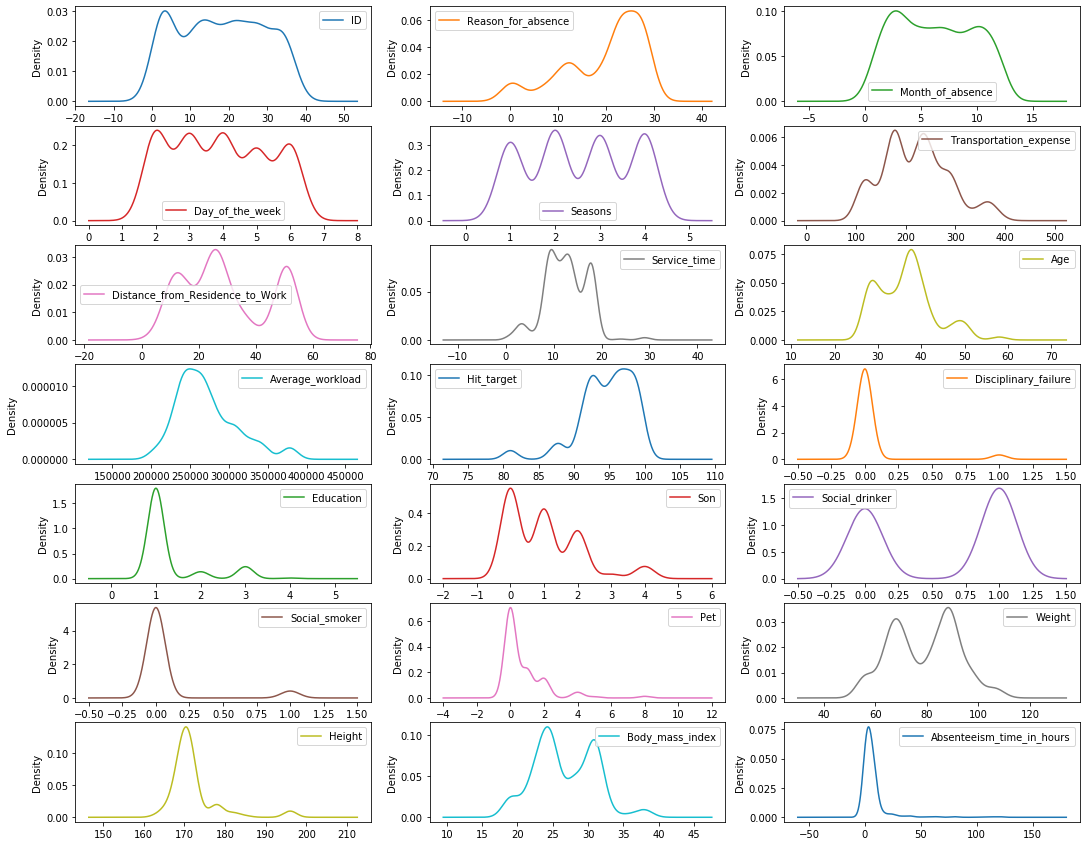

In [20]:
# Kernel Density Estimate (KDE) plot for distribution of features in the data
emp.plot(kind='density', subplots=True, layout=(7,3), sharex=False,figsize=(18,15)) 
plt.show()

**Infer :  None of the features follow Normal distribution<br>**

*From the above Box and whisker plots, we can observe that not all the features contains outliers. Continuous features like ‘Weight’, ‘Distance from residence to work’ does not contain any outliers at all. Few features like ‘Average_workload’, ‘Hit_target’ ’Age’, ‘Service_time’ and ‘Height’, have a very few outliers.<br>*

*It is also evident from the above plot that none of the features are symmetric to the median and it can easily be interpreted that none of the features follow symmetric distribution. Also, it can also be observed that Median of the feature ‘Body mass index’ is very close to 25th percentile value which means median of this feature is almost equal to 25th percentile.*


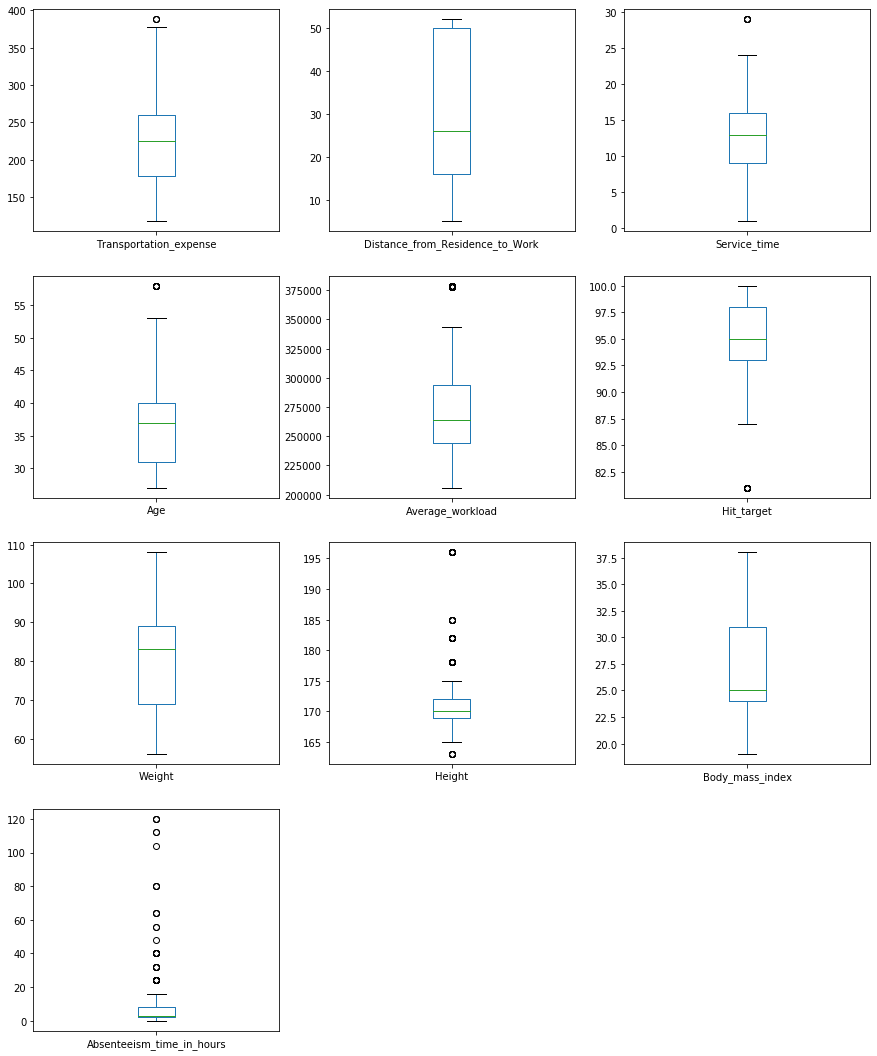

In [21]:
#Box and Whiskers plot of features in the data
data[continous_var].plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=10,figsize=(15,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

**Infer:<br>**
The dataset contains both contionus & categorical features. the purpose of boxplot is to visualize the outliers in the continous varibles.<br>
* Features like 'Service_time', 'Average_workload', 'Transportation_expense', 'Hit_target', contains a few outliers.<br>

* It can also be seen that features like 'Absenteeism_time_in_hours', 'Height' contains the most number of outliers.

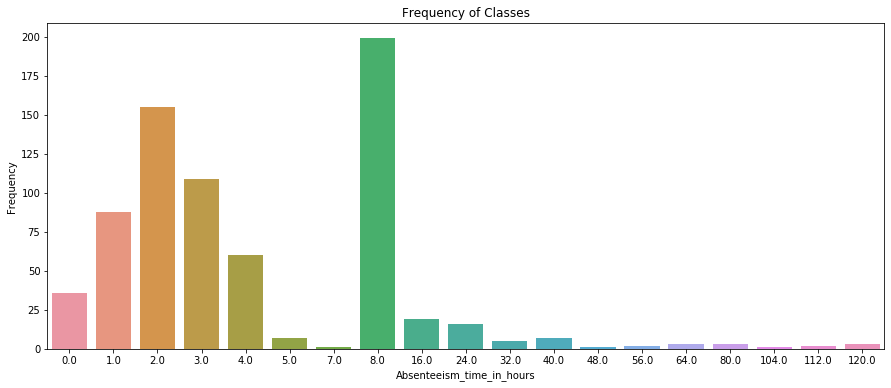

In [22]:
# Checking the distribution of target feature
sns.mpl.rc("figure", figsize=(15,6))
sns.countplot(x="Absenteeism_time_in_hours", data= data)
plt.ylabel('Frequency')
plt.xlabel('Absenteeism_time_in_hours')
plt.title("Frequency of Classes")
plt.show()

**Infer :**<br>
 * *From the above plot, it is obvious that maximum number (i.e around 200) of employes are absent for 8 hours.*
 * *Around 420 employes are absent for 1 to 4 hours.*
 * *Only 36 employes doesnt take any leave.*
 * *There are only 27 employes, who take leave for 40-120 hours.*

*One observation that is worth noting from the above plot is that, after class 8, every other class is a multiple of 8.*


**ALso, as we can see, 'Absenteeism_time_in_hours' are 0 in 36 places.This could be result of cancelled or withdrwan leaves. <br>
Lets drop these observations**


In [23]:
#droping the observations of 'Absenteeism_time_in_hours' with '0'
data = data[(data.Absenteeism_time_in_hours > 0)]

## 2.3.2 Bivarient Analysis

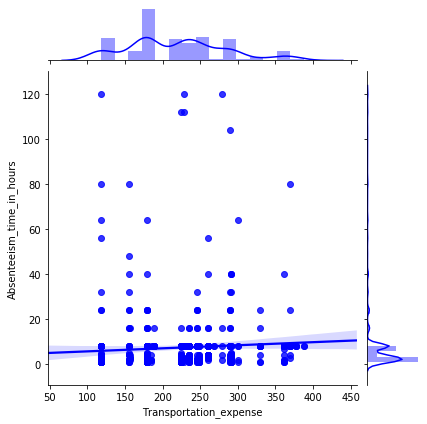

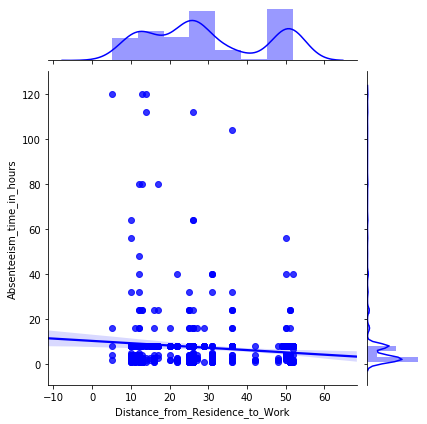

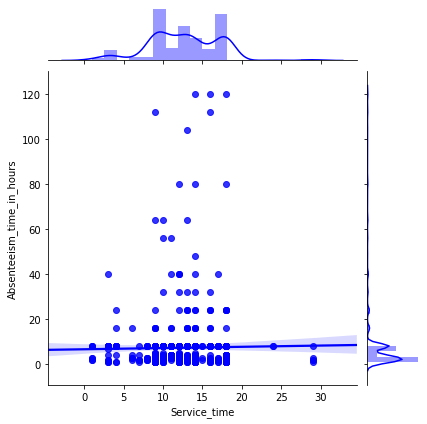

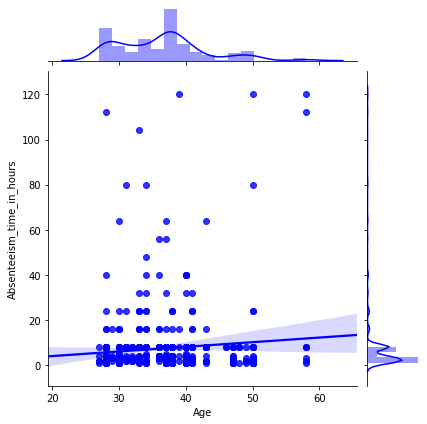

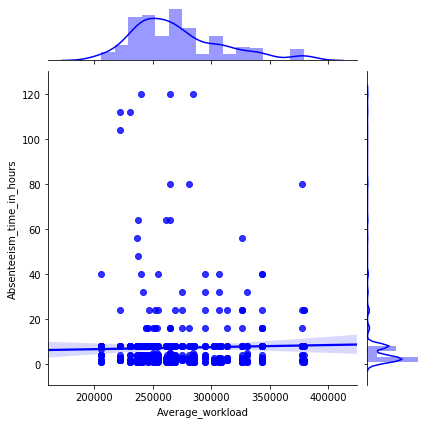

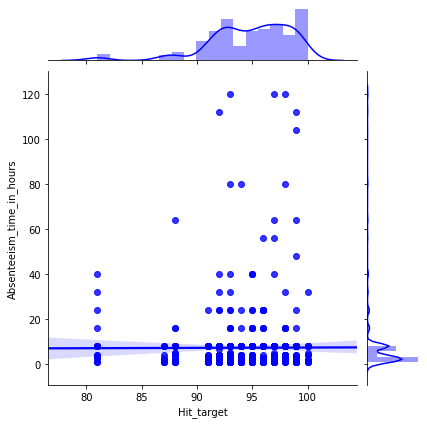

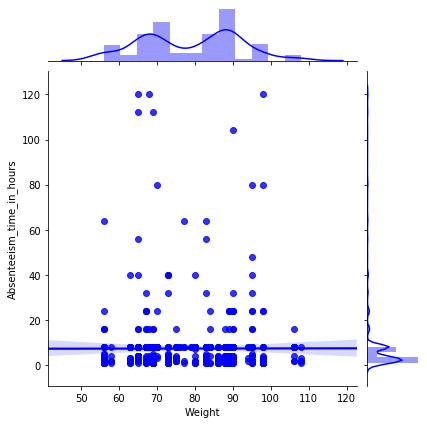

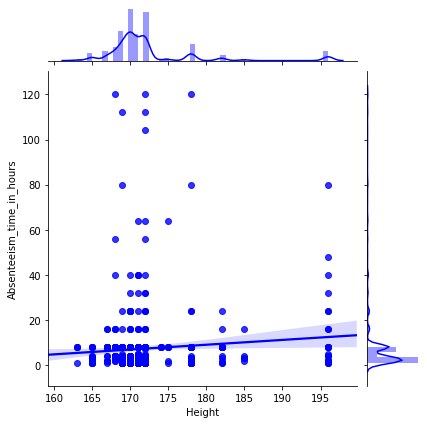

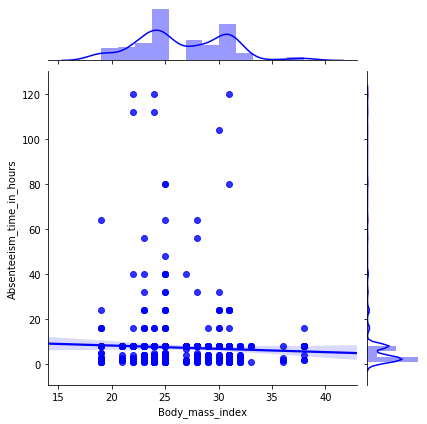

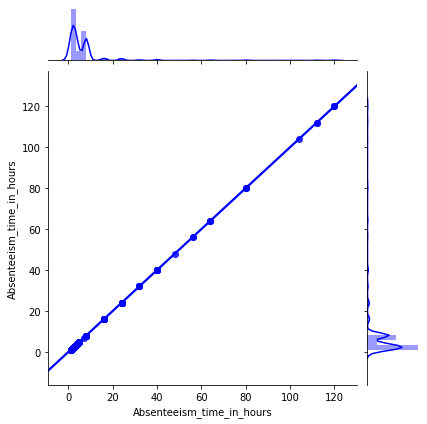

In [24]:
#The relationship btwn independent continous variables and Target variable using JOINT PLOTs
for i in continous_var:
    sns.jointplot(i, "Absenteeism_time_in_hours", data=data, kind='reg', color='b', size=6, dropna=True)

**Infer:** <br>
* *This clearly shows concentration of leaves more where the 'Transportation_expense' is between 150-300.*
* *This clearly shows concentration of leaves more where the 'Distance_from_Resistance_to_work' is between 10-30 km.*
* *Employees with 'service_time'(service years) less than 8 and more than 18 tends to take less leaves.*

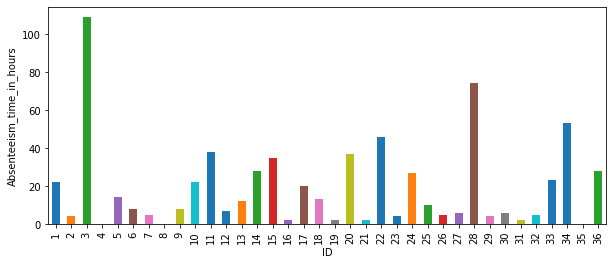

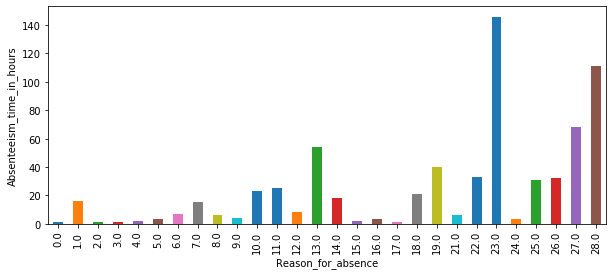

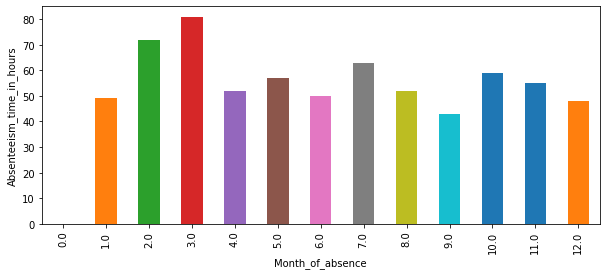

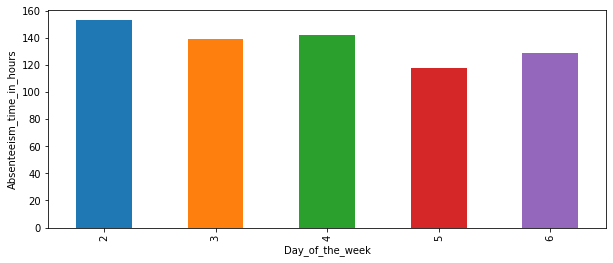

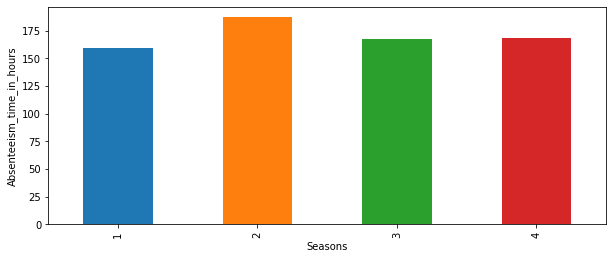

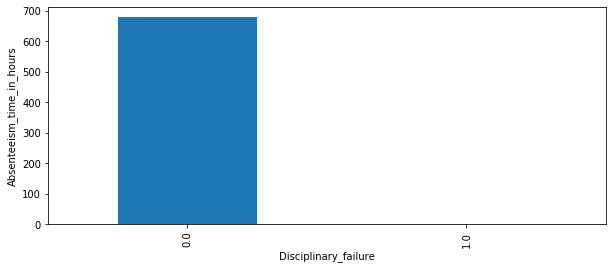

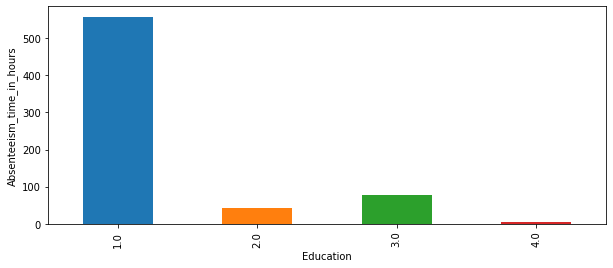

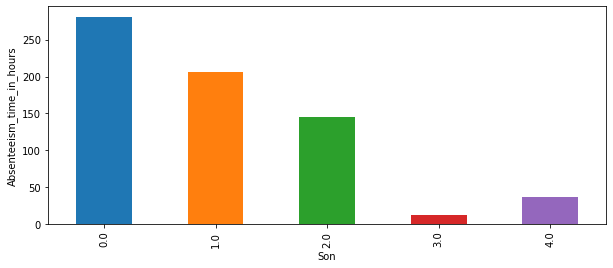

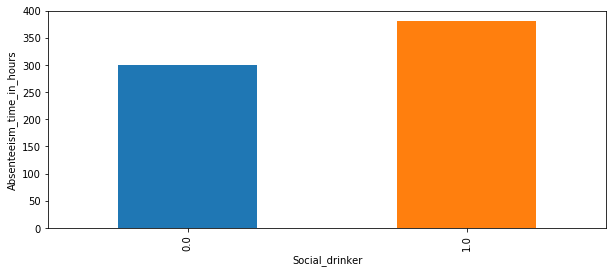

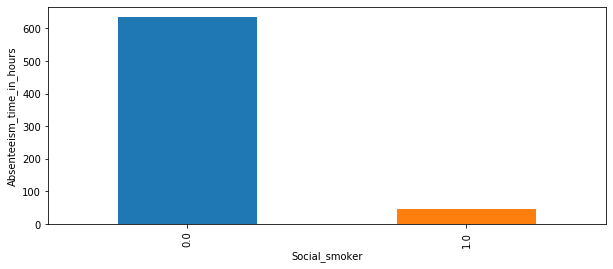

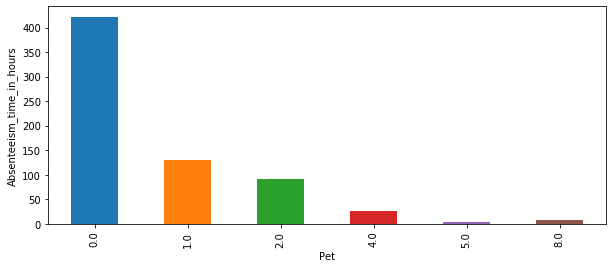

In [25]:
#The relationship btwn independent categorical variables and Target variable.
for i in categorical_var:
 data.groupby(i)['Absenteeism_time_in_hours'].count().plot(kind='bar',figsize=(10,4))
 plt.ylabel('Absenteeism_time_in_hours')
 plt.show()

**Infer:**<br>
* *Longest hours of Absence for the Reasons as follows 23,28,13,27,19...*
     * *#23 - medical consultation (23).*
     * *#28 - dental consultation (28).*
     * *#13 - Diseases of the musculoskeletal system and connective tissue.*
     * *#27- physiotherapy (27).*
     * *#19 - Injury, poisoning and certain other consequences of external causes.*

* *From 'Month_of_absent' distribution, we can see that frquency of leaves are more or less uniformally distributed over months, with highest no. of leaves taken in March, Feb and July(holiday season).*
* *From, Absent_Weekday distribution, we can see that frquency of leaves are mostly distributed, with most frequent leaves on 'Monday'.*
* *Displinary failures are very least.*
* *Employee with Education ‘High School’ tend to take more hours of absence.*
* *Employee with 3-4 kids tend to take less hours of absence.*
* *'Social Drinker' takes little more leaves than non drinker.*
* *From, 'Son' and 'Pet', we can see that people having no kids and no pets(no family responsibilities) tend to take frequent leaves.*

## 2.4 Outlier Analysis 

*From boxplot Outliers are found in 'Service_time', 'Average_workload', 'Transportation_expense', 'Hit_target', 'Absenteeism_time_in_hours', 'Height'.*

In [26]:
#Create a function to remove outliers 
def rm_outlier(data,col_name):
    q75,q25 = np.percentile(data[col_name],[75,25])       # Getting 75th and 25th Percentile
    iqr = q75 - q25                                       # Calculating Interquartile range
    lower_fence = q25 - (iqr*1.5)                         # Lower fence
    upper_fence = q75 + (iqr*1.5)                         # Upper fence 
    df = data.loc[(data[col_name] > lower_fence) & (data[col_name]< upper_fence)]
    return df

#remove outliers (excluding  'Service_time' & 'Age')
c_out=continous_var.copy()
c_out.remove('Service_time') 
c_out.remove('Age')

for i in c_out:
    data=rm_outlier(data,i)

In [27]:
data.shape

(518, 21)

# 2.5 Feature Selection

## 2.5.1 Correlation Plot

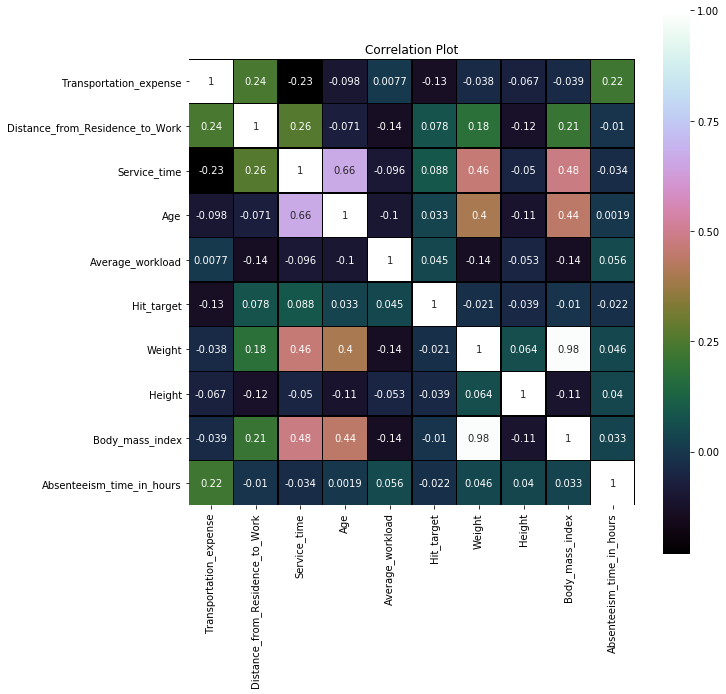

In [28]:
#Correlation Plot
corr=data[continous_var].corr()

#Set the width and hieght of the plot
plt.figure(figsize=(10, 10))
#Plot using seaborn library
plt.title('Correlation Plot')
correlation_plot = sns.heatmap(corr, linewidths=0.4,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

 **Infer:<br>**
 *
 *This shows that there is multicollinearity in the dataset. "Body_mass_index" and "Weight" are highly correlated.* <br>
 
*r("Body_mass_index")< r("Weight") while comparing with target variable.*<br>
*So,we are droping "Body_mass_index".*

In [29]:
#correlation matrix
corr

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Average_workload,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Transportation_expense,1.000000,0.239980,-0.231860,-0.097858,0.007671,-0.132020,-0.038101,-0.066956,-0.038759,0.224473
Distance_from_Residence_to_Work,0.239980,1.000000,0.260255,-0.070828,-0.138055,0.077697,0.178734,-0.123994,0.206756,-0.010071
Service_time,-0.231860,0.260255,1.000000,0.663346,-0.096405,0.088032,0.463884,-0.050117,0.481336,-0.033901
Age,-0.097858,-0.070828,0.663346,1.000000,-0.100079,0.032961,0.399500,-0.112962,0.437281,0.001935
Average_workload,0.007671,-0.138055,-0.096405,-0.100079,1.000000,0.044601,-0.140410,-0.052677,-0.136834,0.055912
Hit_target,-0.132020,0.077697,0.088032,0.032961,0.044601,1.000000,-0.020508,-0.039490,-0.010101,-0.022284
Weight,-0.038101,0.178734,0.463884,0.399500,-0.140410,-0.020508,1.000000,0.064462,0.983009,0.045945
Height,-0.066956,-0.123994,-0.050117,-0.112962,-0.052677,-0.039490,0.064462,1.000000,-0.109843,0.039851
Body_mass_index,-0.038759,0.206756,0.481336,0.437281,-0.136834,-0.010101,0.983009,-0.109843,1.000000,0.033221
Absenteeism_time_in_hours,0.224473,-0.010071,-0.033901,0.001935,0.055912,-0.022284,0.045945,0.039851,0.033221,1.000000


In [30]:
#droping corelated variable
data = data.drop(['Body_mass_index'], axis=1)

# Updating the Continous Variables and Categorical Variables after droping some variables
continous_var.remove('Body_mass_index')

## 2.5.2 ANOVA Test

In [31]:
#loop for ANOVA test Since the target variable is continuous
for i in categorical_var:
    f, p = stats.f_oneway(data[i], data['Absenteeism_time_in_hours'])
    print("P value for variable "+str(i)+" is "+str(p)  )

P value for variable ID is 1.163361559385071e-111
P value for variable Reason_for_absence is 3.48339306674973e-284
P value for variable Month_of_absence is 1.8495433309066213e-17
P value for variable Day_of_the_week is 0.00278244924245008
P value for variable Seasons is 1.0833451493435325e-33
P value for variable Disciplinary_failure is 4.587844572173298e-149
P value for variable Education is 6.114138489863087e-85
P value for variable Son is 3.8532603311727834e-92
P value for variable Social_drinker is 3.1995777095638805e-122
P value for variable Social_smoker is 1.74076486489892e-145
P value for variable Pet is 2.1953439799006095e-106


#### Spliting the data in to target & predictor 

In [32]:
data= data.reset_index(drop = True)
#spliting the train data
x_data = data.drop(['Absenteeism_time_in_hours'], axis=1)
y_data = data['Absenteeism_time_in_hours'] 

##  2.6 Feature Scaling 

In [33]:
#Nomalisation
cnames=continous_var.copy()
cnames.remove('Absenteeism_time_in_hours')

for i in cnames:
    print(i)
    x_data[i] = (x_data[i] - np.min(x_data[i]))/(np.max(x_data[i]) - np.min(x_data[i]))

Transportation_expense
Distance_from_Residence_to_Work
Service_time
Age
Average_workload
Hit_target
Weight
Height


#### Get dummies for categorical variables

In [34]:
# Copying dataframe
df1 = x_data.copy()

# Get dummy variables for categorical variables
x_data = pd.get_dummies(data = x_data, columns = categorical_var)

x_data.shape

(518, 115)

## 2.6 Dimensionality Reduction using Principal Component Analysis

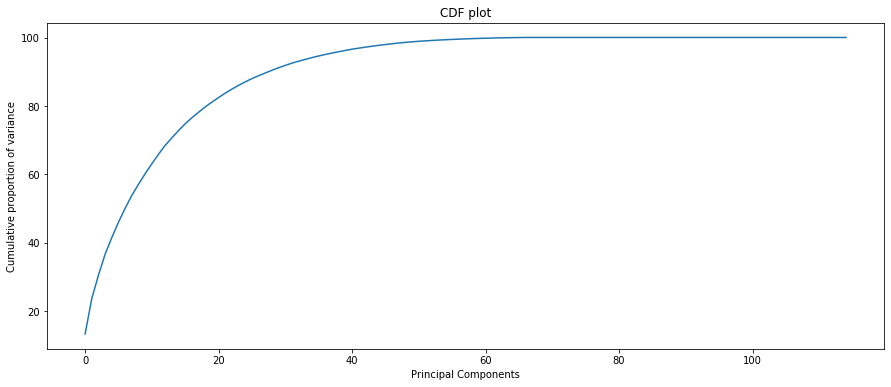

In [35]:
from sklearn.decomposition import PCA

# Converting data to numpy array
#X = x_data.values
X=x_data.copy()

# Data has 115 variables so no of components of PCA:115
pca = PCA(n_components=115)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative proportion of variance')
plt.title('CDF plot')
plt.show()

**Infer : <br>**
*We can see that, almost 98% variance is explained by less than 50 variables.*

In [36]:
X=x_data.copy()

# From the above plot selecting 95% data variance
pca = PCA(.95)

# Fitting the 95% of selected components to the data
X=pca.fit(X).transform(X)

X=pd.DataFrame(X)
X.shape[1]

37

*Almost 95% variance is explained by just 37 variables. So, we will reduce the components to 37*

In [37]:
#splitting data into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2)
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [38]:
print(x_train.shape)
print(x_test.shape)

(414, 37)
(104, 37)


# 3. MODELLING

## 3.1 Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor

#defining the function for Decision tree with variable depth
def DT_model(depth):
    DT = DecisionTreeRegressor( max_depth = depth).fit(x_train, y_train)
    y_pred = DT.predict(x_test)
    print('depth : {} \t : Decision Tree rmse: {}'.format(depth,(sqrt(mean_squared_error(y_test,y_pred)))))
    

In [40]:
for depth in [1,2,3,4,5,10,15,None]:
    DT_model(depth)

depth : 1 	 : Decision Tree rmse: 3.1566869131603124
depth : 2 	 : Decision Tree rmse: 3.1773660070717655
depth : 3 	 : Decision Tree rmse: 3.1204503376692476
depth : 4 	 : Decision Tree rmse: 2.934150076172784
depth : 5 	 : Decision Tree rmse: 3.4298177157645107
depth : 10 	 : Decision Tree rmse: 3.4962805305347504
depth : 15 	 : Decision Tree rmse: 3.5696365391125635
depth : None 	 : Decision Tree rmse: 3.759105753816467


*Freeze the Decisiontree  model with max_depth = 1.*

## 3.2 Random Forest 

In [41]:
from sklearn.ensemble import RandomForestRegressor

#defining the function for Random forest with n_est & depth.
def RF_model(n_est, depth):
 RF = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1).fit(x_train, y_train)
 y_pred = RF.predict(x_test)
 print('depth : {},\t n_estimators : {}  \t: RF rmse: {}'.format(depth, n_est, (sqrt(mean_squared_error(y_test,y_pred)))))  


In [42]:
for n_est in [100, 200, 500, 1000]:
    for depth in [2, 5, 10 , 20]:
        RF_model(n_est, depth)

depth : 2,	 n_estimators : 100  	: RF rmse: 2.9983940131776583
depth : 5,	 n_estimators : 100  	: RF rmse: 2.705175401301781
depth : 10,	 n_estimators : 100  	: RF rmse: 2.61983797254309
depth : 20,	 n_estimators : 100  	: RF rmse: 2.6903719422401235
depth : 2,	 n_estimators : 200  	: RF rmse: 2.980419553367367
depth : 5,	 n_estimators : 200  	: RF rmse: 2.7072251333071797
depth : 10,	 n_estimators : 200  	: RF rmse: 2.619571223693843
depth : 20,	 n_estimators : 200  	: RF rmse: 2.6868702202800145
depth : 2,	 n_estimators : 500  	: RF rmse: 2.985425724332235
depth : 5,	 n_estimators : 500  	: RF rmse: 2.7008526105931905
depth : 10,	 n_estimators : 500  	: RF rmse: 2.631458769467894
depth : 20,	 n_estimators : 500  	: RF rmse: 2.64571408421635
depth : 2,	 n_estimators : 1000  	: RF rmse: 2.9758881166146813
depth : 5,	 n_estimators : 1000  	: RF rmse: 2.719614824338637
depth : 10,	 n_estimators : 1000  	: RF rmse: 2.623363779076502
depth : 20,	 n_estimators : 1000  	: RF rmse: 2.63767804

## 3.3 Linear regression (Ordinary Least Squares)

In [43]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
model = ols.fit(x_train, y_train)
y_pred = model.predict(x_train)

In [44]:
print('Ordinary Least Squares rmse: {}'.format(sqrt(mean_squared_error(y_train,y_pred))))

Ordinary Least Squares rmse: 2.3863157453882082


## 3.4 Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
def RIDGE_model(alpha):
    model = Ridge(alpha= alpha).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('alpha : {}  \t:Ridge rmse: {}'.format(alpha, (sqrt(mean_squared_error(y_test,y_pred)))))

In [46]:
for alpha in [0.1,0.5, 1.0,3.0,7.0,10.0]:
    RIDGE_model(alpha)

alpha : 0.1  	:Ridge rmse: 2.6148339346379905
alpha : 0.5  	:Ridge rmse: 2.610914246022059
alpha : 1.0  	:Ridge rmse: 2.6067360504176595
alpha : 3.0  	:Ridge rmse: 2.5962133044584945
alpha : 7.0  	:Ridge rmse: 2.5929921988688536
alpha : 10.0  	:Ridge rmse: 2.5985346237978133


## 3.5 KNN Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor
def KNN_model(n_neigh):
    model = KNeighborsRegressor(n_neighbors= n_neigh).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('n_neighbours : {}  \t: KNN rmse: {}'.format(n_neigh,(sqrt(mean_squared_error(y_test,y_pred)))))

In [48]:
for n_neigh in [3,5,7,10,15,20,25,30]:
    KNN_model(n_neigh)

n_neighbours : 3  	: KNN rmse: 2.9368350311176825
n_neighbours : 5  	: KNN rmse: 2.7201527106452623
n_neighbours : 7  	: KNN rmse: 2.765352464753293
n_neighbours : 10  	: KNN rmse: 2.790161285660741
n_neighbours : 15  	: KNN rmse: 2.886840167699998
n_neighbours : 20  	: KNN rmse: 2.909971252831837
n_neighbours : 25  	: KNN rmse: 2.9617977908436206
n_neighbours : 30  	: KNN rmse: 2.992251389183131


## 3.6 Support Vector Regression

In [49]:
from sklearn.svm import SVR
def SVR_model(C, gamma):
    model = SVR(C= C, gamma = gamma).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('C : {} ,::\t gamma : {} ::\t:SVR rmse: {}'.format(C, gamma ,(sqrt(mean_squared_error(y_test,y_pred)))))

In [50]:
for C in [1, 10, 100,1000]:
    for gamma in [0.001, 0.0001]:
        SVR_model(C, gamma)

C : 1 ,::	 gamma : 0.001 ::	:SVR rmse: 3.669310799662161
C : 1 ,::	 gamma : 0.0001 ::	:SVR rmse: 3.728216736928098
C : 10 ,::	 gamma : 0.001 ::	:SVR rmse: 3.2177240864532566
C : 10 ,::	 gamma : 0.0001 ::	:SVR rmse: 3.668562569347838
C : 100 ,::	 gamma : 0.001 ::	:SVR rmse: 2.6359762004447505
C : 100 ,::	 gamma : 0.0001 ::	:SVR rmse: 3.2149379622172223
C : 1000 ,::	 gamma : 0.001 ::	:SVR rmse: 2.7150986143043303
C : 1000 ,::	 gamma : 0.0001 ::	:SVR rmse: 2.635071831387946


## 3.7 Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
def GBR_model(depth, learning_rate):
    model = GradientBoostingRegressor( max_depth = depth, learning_rate =learning_rate).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('depth: {},\t:learning_rate: {} \t: rmse: {}'.format(depth,learning_rate,(sqrt(mean_squared_error(y_test,y_pred)))))  
    

In [52]:
for depth in [1,2,5,None]:
    for learning_rate in [0.001,0.01,0.1]:
        GBR_model(depth, learning_rate)

depth: 1,	:learning_rate: 0.001 	: rmse: 3.335831799635012
depth: 1,	:learning_rate: 0.01 	: rmse: 3.182843770625191
depth: 1,	:learning_rate: 0.1 	: rmse: 2.7617526376034403
depth: 2,	:learning_rate: 0.001 	: rmse: 3.318976635532007
depth: 2,	:learning_rate: 0.01 	: rmse: 3.0543369148384776
depth: 2,	:learning_rate: 0.1 	: rmse: 2.618508806550686
depth: 5,	:learning_rate: 0.001 	: rmse: 3.257719044995495
depth: 5,	:learning_rate: 0.01 	: rmse: 2.7995160159985337
depth: 5,	:learning_rate: 0.1 	: rmse: 2.8105606122211264
depth: None,	:learning_rate: 0.001 	: rmse: 3.2510549571906107
depth: None,	:learning_rate: 0.01 	: rmse: 3.1350986934626004
depth: None,	:learning_rate: 0.1 	: rmse: 3.5331160705548146


## 4. Model selection

In [53]:
ML = pd.DataFrame({"rmse":[2.570,2.143,2.488,2.116,2.273,2.175,2.147],
                   "Model" : ['Decision Trees',"Random Forest" ,'Linear Regression','Ridge Regression','KNN Regression',
                             'Support Vector Regression',"Gradient Boosting"]})
ML

,Model,rmse
0,Decision Trees,2.570
1,Random Forest,2.143
2,Linear Regression,2.488
3,Ridge Regression,2.116
4,KNN Regression,2.273
5,Support Vector Regression,2.175
6,Gradient Boosting,2.147


**Infer:<br>** *Looking at models performance, we can say that 'Ridge Regression' is the best model based on RMSE value, followed by 'Random Forest' and 'Support Vector Regression' So, we can pick any of those and perform modelling. All these model will give almost same results.*

In [54]:
#Ridge Regression with alpha=10
model = Ridge(alpha= 10).fit(x_train, y_train)
y_pred = model.predict(x_test)
print("rmse : {}".format(sqrt(mean_squared_error(y_test,y_pred))))

rmse : 2.5985346237978133


In [55]:
#RF
#model = RandomForestRegressor(n_estimators=500, max_depth=20, n_jobs=-1).fit(x_train, y_train)
#y_pred = model.predict(x_test)
#print("rmse : {}".format(sqrt(mean_squared_error(y_test,y_pred))))

#### TEST DATA PREDICTIONS FOR YEAR 2010--->

In [56]:
Absence_prediction=df1.iloc[x_test.index.values,:]
Absence_prediction["Absent_hours"]=y_test
Absence_prediction["Predicted_Absent_hours"]=y_pred
Absence_prediction.head()                  #Sample output(with actual counts and predicted counts)

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Average_workload,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Absent_hours,Predicted_Absent_hours
200,1,25.0,11.0,5,4,0.450000,0.127660,0.423077,0.322581,0.568780,...,0.0,3.0,1.0,0.0,0.0,1.0,0.615385,0.7,2.0,4.259527
35,3,23.0,9.0,3,1,0.234615,0.978723,0.576923,0.354839,0.258920,...,0.0,1.0,0.0,1.0,0.0,0.0,0.634615,0.5,3.0,3.271442
323,5,26.0,8.0,3,1,0.450000,0.319149,0.384615,0.516129,0.319508,...,0.0,1.0,1.0,1.0,0.0,0.0,0.961538,0.2,8.0,6.391356
130,20,28.0,3.0,6,2,0.546154,0.957447,0.307692,0.290323,1.000000,...,0.0,1.0,4.0,1.0,0.0,0.0,0.173077,0.3,4.0,4.842418
497,16,7.0,6.0,4,3,0.000000,0.212766,0.807692,0.612903,0.503670,...,0.0,1.0,2.0,1.0,1.0,0.0,0.365385,1.0,8.0,6.420855


In [57]:
#Predicted absence hours of 2010
Absence_prediction.Predicted_Absent_hours.sum()

480.81191577213144

In [58]:
#Actual absence hours of 2010
Absence_prediction.Absent_hours.sum()

497.0

In [59]:
#Predicted absence hours per month[2010]
Absence_prediction.groupby('Month_of_absence').sum().reset_index()[['Month_of_absence','Absent_hours','Predicted_Absent_hours']]

,Month_of_absence,Absent_hours,Predicted_Absent_hours
0,0.0,0.0,0.000000
1,1.0,22.0,26.391737
2,2.0,38.0,38.288285
3,3.0,96.0,82.595021
4,4.0,28.0,33.975249
5,5.0,32.0,25.398683
6,6.0,36.0,32.181778
7,7.0,56.0,66.077030
8,8.0,37.0,27.448360
9,9.0,8.0,11.792752


*Since, Ridge Regression/ Random Forest model is our final model to be used for prediction, We'll use this model to predict the losses of 2011. Let's prepare data for 2011.<br>*

*To prepare data for 2011,assuming that all the employees are retained in 2011 and all other condition remains and same trends continues, we need to add +1 to 'Service_time' and 'Age'(keeping all other features same).*

## 5. PREDICTIONS FOR YEAR 2011

In [60]:
#data for 2011
#Service and Age will be added by 1

data_2011 = data
data_2011.Service_time = data.Service_time + 1
data_2011.Age = data.Age + 1

In [61]:
data_2011= data_2011.drop(columns = ['Absenteeism_time_in_hours'])

#Normalizing
for i in cnames:
 data_2011[i] = (data_2011[i] - np.min(data_2011[i]))/(np.max(data_2011[i]) - np.min(data_2011[i]))

# Get dummy variables for categorical variables
emp_2011 = pd.get_dummies(data = data_2011, columns = categorical_var)

#pca
pca = PCA(.95)
emp_2011=pca.fit(emp_2011).transform(emp_2011)

#predicting the 2011 model
predict_2011_absence =model.predict(emp_2011)


In [62]:
#Absent prediction 2011
Predit_2011=data_2011
Predit_2011["Absent_hours_2011"]=predict_2011_absence
Predit_2011.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Average_workload,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Absent_hours_2011
0,11,26.0,7.0,3,1,0.657692,0.659574,0.384615,0.193548,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.653846,0.7,8.237755
1,3,23.0,7.0,4,1,0.234615,0.978723,0.576923,0.354839,0.244925,0.769231,0.0,1.0,0.0,1.0,0.0,0.0,0.634615,0.5,3.619642
2,7,7.0,7.0,5,1,0.619231,0.000000,0.423077,0.387097,0.244925,0.769231,0.0,1.0,2.0,1.0,1.0,0.0,0.230769,0.3,7.067774
3,11,23.0,7.0,5,1,0.657692,0.659574,0.384615,0.193548,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.653846,0.7,5.992849
4,10,22.0,7.0,6,1,0.934615,1.000000,0.000000,0.032258,0.244925,0.769231,0.0,1.0,1.0,1.0,0.0,4.0,0.461538,0.7,7.219517


In [63]:
#Predicted absence hours per month of 2011
monthly_absence= Predit_2011.groupby('Month_of_absence').sum().reset_index()[['Month_of_absence','Absent_hours_2011']]
monthly_absence=monthly_absence.drop(monthly_absence.index[0])
monthly_absence

,Month_of_absence,Absent_hours_2011
1,1.0,150.929537
2,2.0,213.564963
3,3.0,342.810677
4,4.0,183.369302
5,5.0,130.928843
6,6.0,105.855510
7,7.0,272.304962
8,8.0,167.423159
9,9.0,87.816583
10,10.0,246.458907


### ---------MONTHLY LOSSES PREDICTED FOR YEAR 2011 PER MONTH -----------

In [64]:
#In a month excluding weekend 22 days are working days.
#there are 36 employee in the xyz company            : data["ID"].nunique() i.e.36
#8 hoursof work per day 

Total_Monthly_hours = 22*8*36

# total losses % = (absent_hours / Total_Monthly_hours)*100
monthly_absence['monthly_loss_percentage'] = (monthly_absence["Absent_hours_2011"]/Total_Monthly_hours) * 100

In [65]:
monthly_absence

,Month_of_absence,Absent_hours_2011,monthly_loss_percentage
1,1.0,150.929537,2.382095
2,2.0,213.564963,3.370659
3,3.0,342.810677,5.410522
4,4.0,183.369302,2.894086
5,5.0,130.928843,2.066427
6,6.0,105.855510,1.670699
7,7.0,272.304962,4.297742
8,8.0,167.423159,2.642411
9,9.0,87.816583,1.385994
10,10.0,246.458907,3.889819


*Looking at the above results, we can observe that most likely,the company would incurred most of loss in the month of 'March', followed by 'October' and 'July'.*

In [66]:
#saving output results
Predit_2011.to_csv("Py_Employee Absenteeism_2011.csv",index=False)
monthly_absence.to_csv("Py_Monthly_loss.csv",index=False)

## *Hereby, concluding the project with above predictions.*
Regards<br>
*SWAROOP H*